In [12]:
# data manipulation
import numpy as np
import pandas as pd
# clustering algo
from sklearn.cluster import KMeans
# visualization
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# printing results
import matplotlib.pyplot as plt
# encoding labels
from sklearn.preprocessing import LabelEncoder
# progress bar
from tqdm.notebook import tqdm_notebook
# scaler
from sklearn.preprocessing import StandardScaler
# loading python objects
import pickle

In this notebook I'm going to do a cluster analysis of the dataset using the features extracted with elaboration.ipybn.<br>The visualization is done by using log mel-spectrograms since is no reccommended using directly the MFCC because the DCT step decorellates the features. Istead MFCC+delta are used to apply clustering.

# Loading data

We start by loading the metadata of our pre-processed containing all the information...

In [39]:
metadata = pd.read_csv("processed_metadata.csv")
metadata.head()

,path,segment,label,samplingrate,ms
0,./Labelled/Bleatings/evt_000_000_000681_210415...,0,Bleatings,16000,3000.0
1,./Labelled/Bleatings/evt_000_000_000681_210415...,1,Bleatings,16000,3000.0
2,./Labelled/Bleatings/evt_000_000_000681_210415...,2,Bleatings,16000,3000.0
3,./Labelled/Bleatings/evt_000_000_000681_210415...,3,Bleatings,16000,3000.0
4,./Labelled/Bleatings/evt_000_000_000681_210415...,4,Bleatings,16000,3000.0


... and extract the label for each sample.

In [40]:
# Separating out the target
y = metadata['label']
#Scaling the feature columns
encoder = LabelEncoder()
y = encoder.fit_transform(y)
np.shape(y)

(6639,)

Next the data of the log mel spetrograms are loaded

In [9]:
logmelspectrograms = pickle.load(open("logmelspectrograms_data.p", "rb" ))
np.shape(logmelspectrograms)

(6639, 128, 94)

Since the samples are in tabular form is compulsory to flatten each matrix to a single row

In [13]:
logmelspectrograms = [sample.flatten() for sample in logmelspectrograms]
np.shape(samples)

(6639, 12032)

Next standardize each column to apply PCA afterwards

In [14]:
scaler = StandardScaler()
logmelspectrograms = scaler.fit_transform(logmelspectrograms)

Load MFCC and delta-MFCC features for k-means

In [27]:
features = pd.read_csv("mfcc_deltamfcc_entire.csv", index_col='Unnamed: 0')
features.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,-498.372785,70.558003,-17.394419,22.370149,-2.773349,-8.818175,-3.375472,-3.880317,0.060479,-5.638018,...,-9.810652,-15.771450,-9.511748,-4.777353,-3.628776,-8.057930,-7.059937,-5.427528,-9.378248,-2.965233
1,-461.939744,94.490370,-30.162219,19.772600,-8.361755,0.029626,-1.496660,-4.535218,-1.276991,-2.467174,...,-12.708980,-9.712587,-9.239233,-6.313464,-6.577796,-4.884297,-5.886631,-5.312574,-3.758418,-6.700661
2,-529.540707,80.446150,-29.131353,20.216969,0.571056,-8.416232,-5.676588,-8.621220,-1.333912,-5.050858,...,-10.555406,-11.804663,-6.711576,-3.423953,-6.255485,-4.667065,-7.142622,-6.389498,-5.132346,-4.865369
3,-616.144775,50.042843,-27.797401,10.828676,-0.034238,-3.344975,-5.781679,-5.397288,-0.332126,-4.466050,...,-9.258957,-8.813666,-5.116341,-2.900284,-2.844657,-2.890104,-4.251687,-2.681928,-4.668478,-2.775859
4,-471.954266,115.457746,-22.104456,24.454849,-5.564850,2.889188,6.143604,0.236881,-3.250076,-0.004432,...,-10.568315,-10.561276,-8.527216,-5.587518,-7.701231,-6.702233,-6.928992,-5.485289,-7.765387,-6.183199


# Visualization

Let's start by defining a way to visualize our dataset. A good starting point is to take the 2 principal component obtained by PCA over the logmelspectrograms data and plot them.

In [29]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(logmelspectrograms)
pca.explained_variance_ratio_

array([0.39923501, 0.1461488 ])

The 2 principal component only explain about 54% of the variance in data.<br>Let's plot the obtained axis.

In [36]:
def print_axis(components, targets):
    plt.figure(figsize = (12,8))
    plt.scatter(components[:, 0], components[:, 1], c=targets, alpha=0.5)
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    targets = [0,1,2]
    plt.legend(targets)

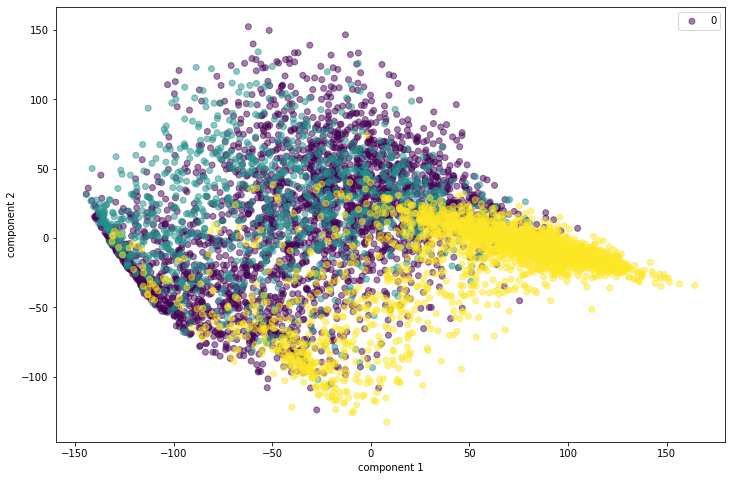

In [41]:
print_axis(principalComponents, y)

The plot is a bit messy... let's try to improve the printing by using T-SNE.<br>To further reduce the noise and speed-up the computation I extract the 50 principal components obtained by PCA and use them for T-SNE.

In [43]:
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(logmelspectrograms)
np.sum(pca.explained_variance_ratio_)

0.9037252871851948

This time we captured 90% of variance in data!<br>Apply t-sne over the transformed data and print the result.

In [45]:
components = TSNE(n_components=2, random_state=50).fit_transform(principalComponents)

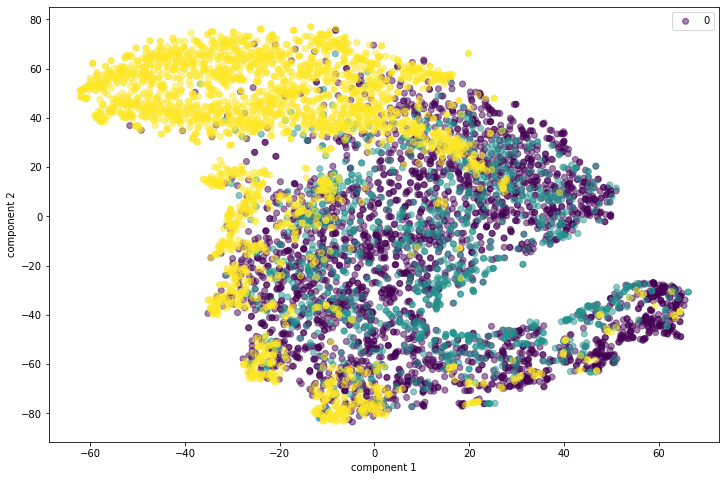

In [46]:
print_axis(components, y)

This way we obtained a slightly better rapprensetation of data!